In [1]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import sys
import string
from wordcloud import WordCloud, STOPWORDS

In [2]:
processed_tweets = pd.read_csv('../data/processed_tweet_data.csv')
processed_tweets.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Wed Aug 03 20:19:13 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,0.300000,0.203571,en,0,0,DzCritical,318,373,NaN,"['Pelosi', 'Taiwan', 'NATO', '5G']",Flightradar24,Algérie
1,Tue Aug 02 15:24:42 +0000 2022,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Watch the video of the beginning of the Chines...,0.000000,0.000000,en,3,0,toopsat,764,144,False,"['Pelosi', 'マツコの知らない世界', 'Yediiklim', 'BadDeci...",Reno Omokri,NaN
2,Tue Aug 02 15:02:35 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,0.000000,0.000000,en,2,0,NassimaLilEmy,64,47,False,"['Pelosi', 'Taipei', 'taiwan', 'XiJinping', 'C...",Peter Obi,Algérie
3,Mon Aug 01 13:51:42 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,0,0,d_dhayae,60,463,False,"['HOBIPALOOZA', 'LaAcademiaExpulsion', 'WEURO2...",BBC News (World),Chlef
4,Sun Jul 31 20:02:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#Pelosi\n#china\nChina Time ✌️ https://t.co/tE...,0.000000,0.000000,en,2,0,Mohamme65404115,39,206,False,"['Pelosi', 'china']",Nancy Pelosi,Algérie


<h3>Exploring the Data</h3>

*   Find what columns we have
*   Find how many data we have
*   Find out what type of data there is in each column
*   Check for missing values

In [3]:
# View the list of columns

list(processed_tweets.columns) 

['created_at',
 'source',
 'original_text',
 'polarity',
 'subjectivity',
 'lang',
 'favorite_count',
 'retweet_count',
 'original_author',
 'followers_count',
 'friends_count',
 'possibly_sensitive',
 'hashtags',
 'user_mentions',
 'place']

In [4]:
# Find out details about each column
processed_tweets.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19011 entries, 0 to 19010
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          19011 non-null  object 
 1   source              19011 non-null  object 
 2   original_text       19011 non-null  object 
 3   polarity            19011 non-null  float64
 4   subjectivity        19011 non-null  float64
 5   lang                19011 non-null  object 
 6   favorite_count      19011 non-null  int64  
 7   retweet_count       19011 non-null  int64  
 8   original_author     19011 non-null  object 
 9   followers_count     19011 non-null  int64  
 10  friends_count       19011 non-null  int64  
 11  possibly_sensitive  14869 non-null  object 
 12  hashtags            19011 non-null  object 
 13  user_mentions       19011 non-null  object 
 14  place               18658 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 2.2+

In [5]:

print("Number of missing value(s) of each column:\n\n{}".format(processed_tweets.isnull().sum()))

Number of missing value(s) of each column:

created_at               0
source                   0
original_text            0
polarity                 0
subjectivity             0
lang                     0
favorite_count           0
retweet_count            0
original_author          0
followers_count          0
friends_count            0
possibly_sensitive    4142
hashtags                 0
user_mentions            0
place                  353
dtype: int64


In [6]:
print("Number of missing value(s) - {}".format(processed_tweets.isnull().sum().sum()))

Number of missing value(s) - 4495


In [7]:
print("Columns with missing value(s):{}".format(list(processed_tweets.columns[processed_tweets.isnull().any()])))

Columns with missing value(s):['possibly_sensitive', 'place']


### Missing Values Visualization

<AxesSubplot:>

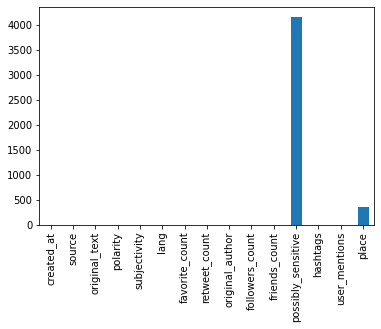

In [8]:
missing_values_count = processed_tweets.isnull().sum()
missing_values_count.plot(kind='bar')

# Data Cleansing

In [9]:
sys.path.append('../')
from clean_tweets_dataframe import Clean_Tweets

In [10]:
# Fill missing values with empty string
processed_tweets = processed_tweets.fillna("")

In [11]:
import re

def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweet: cleaned tweet

    """
    # remove hashtags
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)
    # remove @ handles
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)

    return tweet

In [12]:
import re

def extract_text_from_hashtag(hashtag : str):
    """Process hashtag function.
    Input:
        hashtag: a string containing a hashtag
    Output:
        word: cleaned hashtag

    """
    # remove array characters /[\[\]']+/g
    hashtag = hashtag.replace("[","")
    hashtag = hashtag.replace("]","")
    hashtag = hashtag.replace("'","")
    
    return hashtag

In [13]:
import re

def remove_empty_str(word : str):
    """Process hashtag function.
    Input:
        hashtag: a string containing a hashtag
    Output:
        word: cleaned hashtag

    """
    # remove empty spaces from a word
    word = word.strip()
    
    return word

In [14]:
def data_cleaner(df: pd.DataFrame, save=False) -> pd.DataFrame:
    """Data Cleaner Function.
    Input:
        df: Pandas Dataframe
        save: Boolean value
    Output:
        df: Cleaned Dataframe

    """
    Tweet_cleaner = Clean_Tweets(df)
    df = Tweet_cleaner.remove_non_english_tweets(df)
    df = Tweet_cleaner.drop_duplicate(df)
    df = Tweet_cleaner.drop_unwanted_column(df)
    df = Tweet_cleaner.convert_to_datetime(df)
    df = Tweet_cleaner.convert_to_numbers(df)
    df = Tweet_cleaner.remove_non_english_tweets(df)
    df['clean_text'] = df['original_text'].apply(process_tweet)
    df['clean_text'] =  df['clean_text'].astype(str)
    df['clean_text'] = df['clean_text'].apply(lambda x: x.lower())
    df['clean_text']= df['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))


    if save:
        try: 
            df.to_csv('../data/cleaned_tweet_data.csv', index=False)
            
            print('File Successfully Saved.!!!')
        
        except Exception as e:
            print("Save failed...",e)
    return df

In [15]:
cleaned_df = data_cleaner(processed_tweets, save=True)

Automation in Action...!!!
File Successfully Saved.!!!


In [16]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17853 entries, 0 to 19010
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          17853 non-null  datetime64[ns, UTC]
 1   source              17853 non-null  object             
 2   original_text       17853 non-null  object             
 3   polarity            17853 non-null  float64            
 4   subjectivity        17853 non-null  float64            
 5   lang                17853 non-null  object             
 6   favorite_count      17853 non-null  int64              
 7   retweet_count       17853 non-null  int64              
 8   original_author     17853 non-null  object             
 9   followers_count     17853 non-null  int64              
 10  friends_count       17853 non-null  int64              
 11  possibly_sensitive  17853 non-null  object             
 12  hashtags            17853 non-nu

# Extraction

In [17]:
selected_df = cleaned_df[['clean_text','polarity','subjectivity']]
selected_df.describe()

,polarity,subjectivity
count,17853.000000,17853.000000
mean,0.139762,0.337542
std,0.295999,0.337833
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.300000
75%,0.285714,0.600000
max,1.000000,1.000000


In [18]:
selected_df.isnull().sum()

clean_text      0
polarity        0
subjectivity    0
dtype: int64

In [19]:
cleaned_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,clean_text
0,2022-08-03 20:19:13+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,0.300000,0.203571,en,0,0,DzCritical,318,373,,"['Pelosi', 'Taiwan', 'NATO', '5G']",Flightradar24,Algérie,airplane landed safely in 🇹🇼 \n1 both 🇨🇳 a...
1,2022-08-02 15:24:42+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Watch the video of the beginning of the Chines...,0.000000,0.000000,en,3,0,toopsat,764,144,False,"['Pelosi', 'マツコの知らない世界', 'Yediiklim', 'BadDeci...",Reno Omokri,,watch the video of the beginning of the chines...
2,2022-08-02 15:02:35+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,0.000000,0.000000,en,2,0,NassimaLilEmy,64,47,False,"['Pelosi', 'Taipei', 'taiwan', 'XiJinping', 'C...",Peter Obi,Algérie,\n \n\n \n \non a verge of another war
3,2022-08-01 13:51:42+00:00,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,0,0,d_dhayae,60,463,False,"['HOBIPALOOZA', 'LaAcademiaExpulsion', 'WEURO2...",BBC News (World),Chlef,strong ✍️💜
4,2022-07-31 20:02:20+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi\n#china\nChina Time ✌️ https://t.co/tE...,0.000000,0.000000,en,2,0,Mohamme65404115,39,206,False,"['Pelosi', 'china']",Nancy Pelosi,Algérie,\n\nchina time ✌️


## Frequently used words

In [20]:
flattened_words_df = pd.DataFrame(
    [word for words_list in cleaned_df.clean_text
    for word in words_list.split(' ')],
    columns=['word'])

flattened_words_df.head()

,word
0,
1,airplane
2,landed
3,safely
4,in


In [23]:
# don't take empty strings as a word
flattened_words_df.word=flattened_words_df.word.apply(remove_empty_str)
flattened_words_df.drop(flattened_words_df[flattened_words_df['word']==""].index,axis=0,inplace=True)

##### Visualize

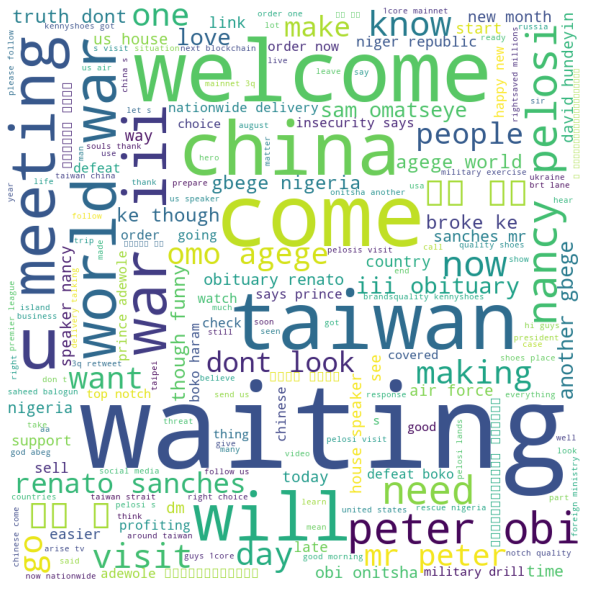

In [25]:
words=(" ").join(list(flattened_words_df["word"]))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Visualize most hashtag words

In [26]:
cleaned_df.hashtags.head()

0                   ['Pelosi', 'Taiwan', 'NATO', '5G']
1    ['Pelosi', 'マツコの知らない世界', 'Yediiklim', 'BadDeci...
2    ['Pelosi', 'Taipei', 'taiwan', 'XiJinping', 'C...
3    ['HOBIPALOOZA', 'LaAcademiaExpulsion', 'WEURO2...
4                                  ['Pelosi', 'china']
Name: hashtags, dtype: object

In [27]:
# remove empty hashtags
cleaned_df.drop(cleaned_df[cleaned_df['hashtags']=="[]"].index,inplace=True)
cleaned_df.hashtags.head()

0                   ['Pelosi', 'Taiwan', 'NATO', '5G']
1    ['Pelosi', 'マツコの知らない世界', 'Yediiklim', 'BadDeci...
2    ['Pelosi', 'Taipei', 'taiwan', 'XiJinping', 'C...
3    ['HOBIPALOOZA', 'LaAcademiaExpulsion', 'WEURO2...
4                                  ['Pelosi', 'china']
Name: hashtags, dtype: object

In [28]:
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in cleaned_df.hashtags
    for hashtag in hashtags_list.split(',')],
    columns=['hashtag'])

flattened_hashtags_df.drop(flattened_hashtags_df[flattened_hashtags_df['hashtag'] == ""].index, inplace=True)
flattened_hashtags_df.reset_index(drop=True, inplace=True)
flattened_hashtags_df['hashtag']=flattened_hashtags_df.hashtag.apply(extract_text_from_hashtag)

<AxesSubplot:>

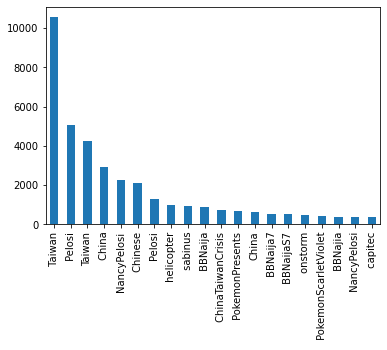

In [29]:
flattened_hashtags_df.hashtag.value_counts()[:20].plot(kind='bar')

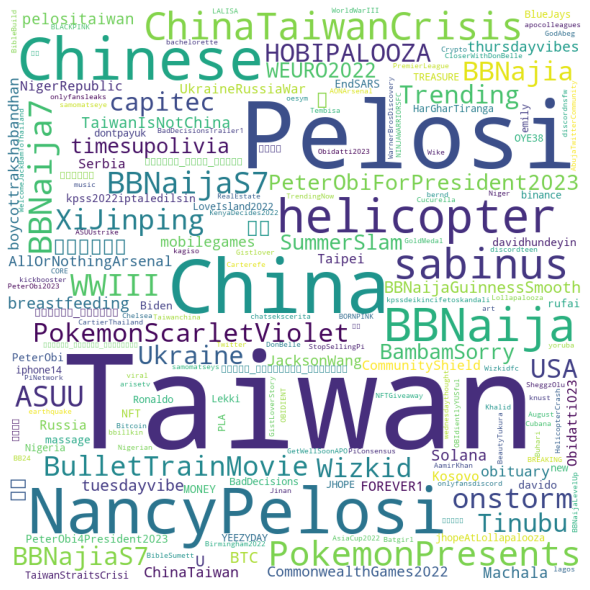

In [30]:
hashWords=(" ").join(list(flattened_hashtags_df["hashtag"]))
hashWordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,
                collocations=False).generate(hashWords)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(hashWordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()